# 期中作业说明：
目标函数：$$\frac{x^4\cdot(1-x)^4}{1+x^2}$$ 我们利用不同方法求解：$$\int^1_0\frac{x^4\cdot(1-x)^4}{1+x^2}$$
该文件包含以下部分：
1. Simpson法计算结果，并分析误差随步长变化的阶数。
2. 自适应积分法-对传统Simpson方法的改进。
3. 对不同方法优劣的讨论分析。


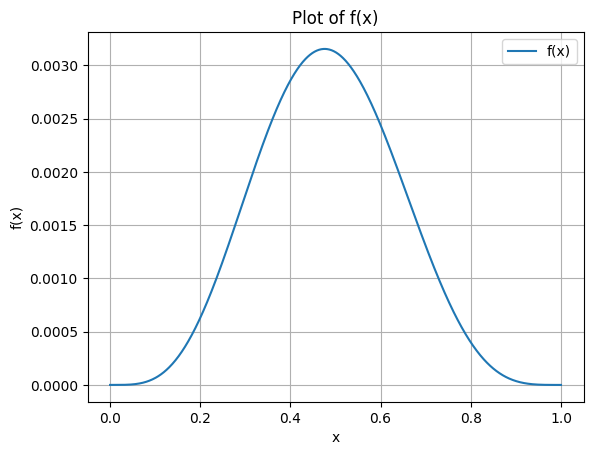

In [100]:
import numpy as np
def f(x):
    return (x**4)*((1-x)**4)/(1+x**2)
x=np.linspace(0, 1, 1000)
y=f(x)
import matplotlib.pyplot as plt
plt.plot(x, y, label='f(x)')
plt.title('Plot of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

积分结果为： 0.001264489267349599
误差为： 0.0
计算时间为： 1.043898344039917 秒


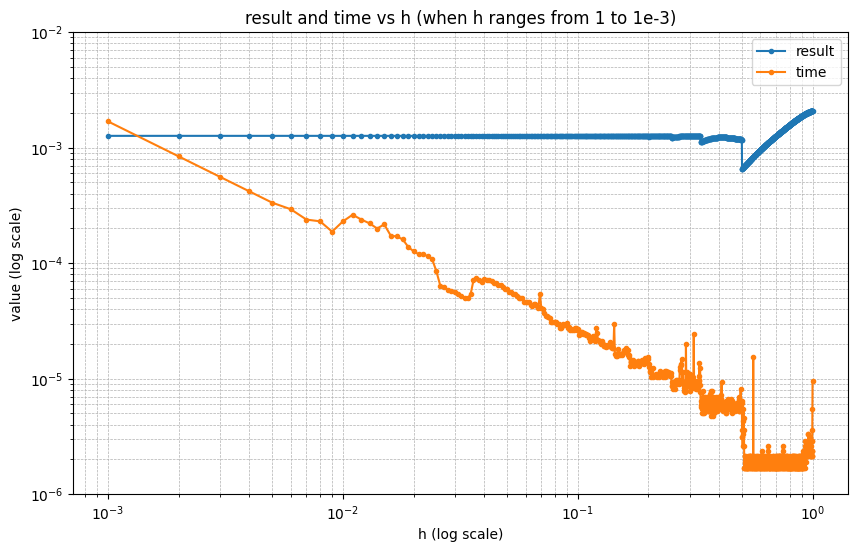

In [ ]:
from math import pi
import time
import numpy as np
def f(x):
    return (x**4)*((1-x)**4)/(1+x**2)

    # 定义函数f(x)，用于计算目标函数的值
h=1e-8 # 步长
h=float(h)
down=0
up=1
n=int((up-down)/h)
result=0
starttime = time.time()
for i in range(n):
    x1=down+i*h
    x2=down+(i+1)*h
    result+=f(x1)+f(x2)+4*f((x1+x2)/2) # 计算每个小区间的函数值
result = result * h / 6 # 计算积分值
endtime = time.time()
usetime = endtime - starttime
error=abs(result-22/7+pi) # 计算误差

print("积分结果为：",result)
print("误差为：",error)
print("计算时间为：", usetime, "秒")

manyh=np.linspace(1, 1e-3, 1000)
result=[]
manyerror=[]
times=[]

for i in range(len(manyh)):
    down = 0
    up = 1
    h = manyh[i]
    n = int((up - down) / h)
    temp_result = 0
    starttime = time.time()
    for j in range(n):
        x1 = down + j * h
        x2 = down + (j + 1) * h
        temp_result += f(x1) + f(x2) + 4 * f((x1 + x2) / 2) # 计算每个小区间的函数值
    endtime = time.time()
    usetime = endtime - starttime
    times.append(usetime)
    temp_result = temp_result * h / 6
    result.append(temp_result)
    manyerror.append(abs(temp_result - 22 / 7 + pi))

#作图
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(10, 6))
plt.plot(manyh, result, marker='o',markersize=3, label='result')
plt.plot(manyh, times, marker='o',markersize=3, label='time')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h (log scale)')
plt.ylabel('value (log scale)')
plt.ylim(1e-6, 1e-2)  
plt.title('result and time vs h (when h ranges from 1 to 1e-3)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('result_and_error_vs_h.png', dpi=600, bbox_inches='tight')
plt.show()




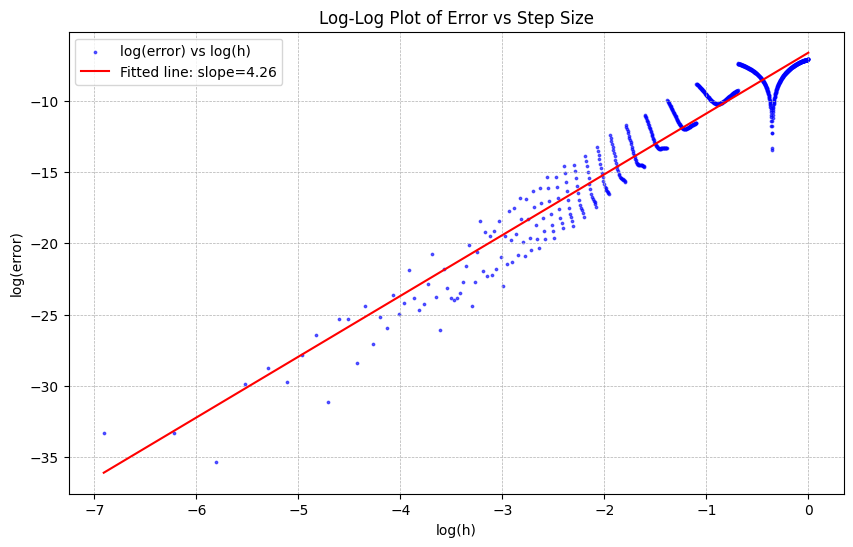

In [ ]:


for i in range(1, len(manyerror)):
    if manyerror[i] == 0:
        manyerror[i] = manyerror[i - 1]
log_h = np.log(manyh)
log_error = np.log(manyerror)


coefficients = np.polyfit(log_h, log_error, 1)  #使用直线拟合求斜率
fitted_line = np.polyval(coefficients, log_h)  


plt.figure(figsize=(10, 6))
plt.scatter(log_h, log_error,s=3, label='log(error) vs log(h)', color='blue', alpha=0.6)
plt.plot(log_h, fitted_line, label=f'Fitted line: slope={coefficients[0]:.2f}', color='red')
plt.xlabel('log(h)')   #转化成便于显示的对数形式
plt.ylabel('log(error)')
plt.title('Log-Log Plot of Error vs Step Size')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('log_error_vs_log_h.png', dpi=600, bbox_inches='tight')
plt.show()


# 结果分析
## 1.误差阶数
### 1.1宏观趋势
当步长小于1e-3后，可显示范围超出默认的浮点数存储精度，故本代码的分析中h下限为1e-3。<br>
在可分辨的范围内，误差对数和步长对数大体上为线性关系，但会在一小段区间内先**下降再突变上升**。
使用`numpy`库的polyfit线性拟合，得到斜率大体为4.26，即$$e\propto h^{4.26}$$
根据课堂讲解得知$$e\propto h^{4}$$故应当写成$$e= 10^{0.26}\cdot h^{4}\approx 1.82\cdot h^4$$
### 1.2 误差震荡的物理机制  
#### 1.2.1 局部截断误差，全局累积误差  
- **局部截断误差**：  
  辛普森法在单个子区间 $[x_i, x_{i+1}]$ 上的误差由泰勒展开的高阶项主导，理论公式为：  
  $$
  e_{\text{local}} \propto h^5 \cdot \max |f^{(4)}(x)|
  $$
  即局部误差与 $h^5$ 和函数四阶导数的幅值成正比。  

- **全局累积误差**：  
  全局误差是各子区间误差的叠加。若积分区间总长为 \(L\)，子区间数为 \(N = L/h\)，则全局误差满足：  
  $$
  e_{\text{global}} = N \cdot e_{\text{local}} \propto \frac{L}{h} \cdot h^5 = L \cdot h^4
  $$
  因此全局误差标度律为 $e \propto h^4$，与拟合结果一致。

#### 1.2.2 步长 $h$ 对误差的竞争效应  
误差的震荡现象源于两种机制的竞争：  
1. **截断误差主导区($h$ 较大时)**：  
   - 步长 $h$ 减小时，局部截断误差 $\propto h^5$ 快速下降，全局误差随之按 $h^4$ 标度减小。  
   - 但当 $h$ 过小时，子区间数 $N \propto 1/h$ 急剧增加，导致浮点运算的**舍入误差**通过 $N$ 次累积被放大。  

2. **舍入误差主导区（$h$ 过小时）**：  
   - 当 $h$ 小于临界值 $h_c$ 时，舍入误差 $\propto N \cdot \epsilon_{\text{machine}} \approx \epsilon_{\text{machine}} / h$ 开始主导，整体误差随 $h$ 减小而**反向增大**。  
   - 临界步长 $h_c$ 由截断误差与舍入误差相等确定，典型值约为 $h_c \sim \epsilon_{\text{machine}}^{1/5}$（对双精度浮点数 $h_c \sim 10^{-3}$）。  

这一竞争机制导致误差曲线在 $h_c$ 附近出现极小值，并在 $h < h_c$ 时发生突升，形成非单调震荡现象。
## 2.运行时间



当我们对时间的要求高而对精度要求变低时，传统辛普森积分法在计算速度上存在缺陷，我们可以通过自适应积分进行优化--在积分过程中不断调整步长
## 说明：没安装Mermaid插件该图表可能会显示乱码，可以在flowchart.png看截图
```mermaid
graph LR
    A(计算左矩形、右矩形和整体积分值)--> E{两个区间结果的差 < 可容忍误差?}
    E -->|是| F[返回当前积分结果]
    E -->|否| G[将区间二分：a-mid 和 mid-b]
    G --> H[递归计算左半区间]
    G --> I[递归计算右半区间]
    H --> A
    I --> A
    F --> J(结束)

    
```


积分结果为： 0.001264495241855605
误差为： 5.974505778993944e-09
计算时间为： 0.0001652240753173828 秒
平均计算时间为： 3.5762786865234375e-06


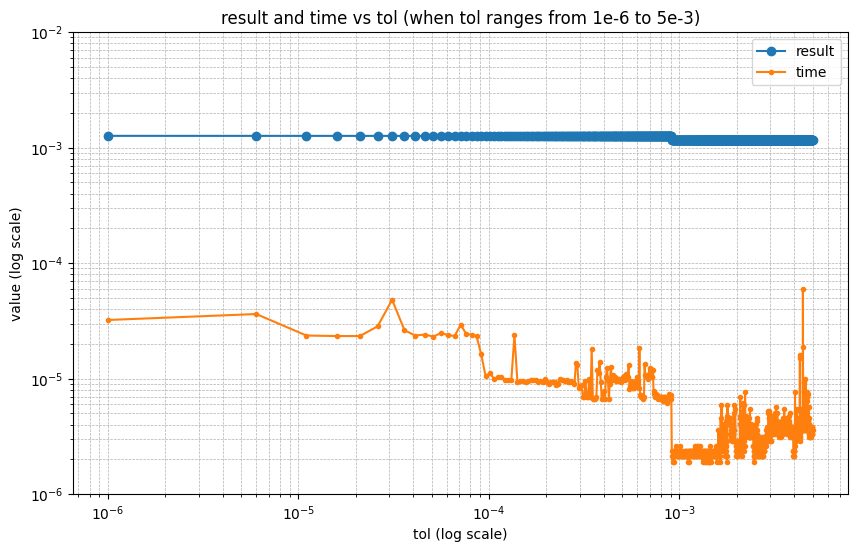

In [ ]:
import time
from math import pi
import numpy as np
def f(x):
    return (x**4)*((1-x)**4)/(1+x**2)
def adapt_int(func, a, b, tol):
    def recur_int(func, a, b, tol):
        mid = (a + b) / 2
        left = (b - a) * (func(a) + 4 * func((a + b) / 2) + func(b)) / 6
        right = ((mid - a) * (func(a) + 4 * func((a + mid) / 2) + func(mid)) / 6 +
                 (b - mid) * (func(mid) + 4 * func((mid + b) / 2) + func(b)) / 6)
        if abs(left - right) < tol: # 误差小于容忍度，返回右侧积分值
            return right
        else:
            return recur_int(func, a, mid, tol / 2) + recur_int(func, mid, b, tol / 2) # 误差较大，递归调用，继续细分区间
    return recur_int(func, a, b, tol)

a = 0
b = 1
tol = 1e-6


starttime = time.time()
result = adapt_int(f, a, b, tol)
endtime = time.time()
usetime = endtime - starttime
error=abs(result-22/7+pi)
print("积分结果为：",result)
print("误差为：",error)
print("计算时间为：", usetime, "秒")

manytol=np.linspace(1e-6, 5e-3, 1000)
result=[]
manyerror=[]
times=[]
finaltimes=[]
for i in range(len(manytol)):
 for _ in range(10):  # 重复10次计算，取平均时间
    times = []
    starttime = time.time()
    singleresult = adapt_int(f, a, b, manytol[i])
    endtime = time.time()
    times.append(endtime - starttime)
 result.append(singleresult)
 avg_time = sum(times) / len(times)
 finaltimes.append(avg_time)
print("平均计算时间为：", avg_time)

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(10, 6))
plt.plot(manytol, result, marker='o', label='result')
plt.plot(manytol, finaltimes, marker='o', markersize=3, label='time')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('tol (log scale)')
plt.ylabel('value (log scale)')
plt.ylim(1e-6, 1e-2)
plt.title('result and time vs tol (when tol ranges from 1e-6 to 5e-3)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('result_and_error_vs_tol.png', dpi=600, bbox_inches='tight')
plt.show()


可以看到在1e-3的容差之内，保持高精度的结果下运算时间(由于电脑的性能不稳定，每次运算结果可能在细节上有差异)缩短了一个数量级，在积分区间很大且存在平缓区域时，自适应积分性能优异，不过这归根到底是空间换时间的做法，当然，也可以通过优化代码实现不递归的写法

# 结论：
1. Simpson积分法在对本函数积分时，0~1区间内误差满足$O(h^4)$，系数为1.82。
2. 在一个小区间内，浮点数精度的舍入误差和函数的近似误差先后占据主导。误差整体上随步长增加而增加，在小区域内随步长增加而降低。
3. 通过自适应积分法，可以在保留1e-6精度下将运算速度提升一个数量级。
<br> <br>
#  如果觉得代码不错，可以求个星星吗 :)<br> https://github.com/k1-star/computational-physics